In [1]:
# Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Importing the dataset

In [4]:
emp = pd.read_csv("D:\Data science\Assignments docs\Simple Linear Regression\emp_data.csv")
emp

,Salary_hike,Churn_out_rate
0,1580,92
1,1600,85
2,1610,80
3,1640,75
4,1660,72
5,1690,70
6,1706,68
7,1730,65
8,1800,62
9,1870,60


In [5]:
emp.columns

Index(['Salary_hike', 'Churn_out_rate'], dtype='object')

In [6]:
# Renaming the column for convinience

In [7]:
emp = emp.rename(columns ={"Salary_hike":"Sal_hike", "Churn_out_rate":"Chur_rate"})

In [8]:
emp.columns

Index(['Sal_hike', 'Chur_rate'], dtype='object')

In [9]:
emp.shape

(10, 2)

In [10]:
# Calculation of skewness and kurtosis to check the type of distribution

In [11]:
emp.skew()

Sal_hike     0.858375
Chur_rate    0.647237
dtype: float64

In [12]:
emp.kurt()

Sal_hike     0.165793
Chur_rate   -0.328199
dtype: float64

In [13]:
# Graphical exploration of the data

(array([2., 1., 2., 1., 1., 1., 0., 1., 0., 1.]),
 array([1580., 1609., 1638., 1667., 1696., 1725., 1754., 1783., 1812.,
        1841., 1870.]),
 <a list of 10 Patch objects>)

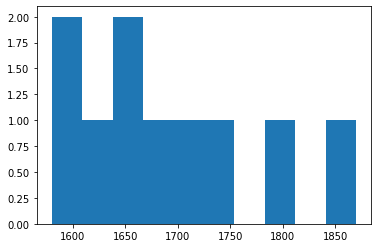

In [14]:
plt.hist(emp.Sal_hike)

{'whiskers': [<matplotlib.lines.Line2D at 0x21463035c88>,
 'caps': [<matplotlib.lines.Line2D at 0x2146303fc48>,
 'boxes': [<matplotlib.lines.Line2D at 0x21463035248>],
 'medians': [<matplotlib.lines.Line2D at 0x21463043bc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x21463043cc8>],
 'means': []}

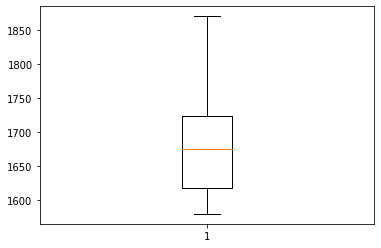

In [15]:
plt.boxplot(emp.Sal_hike)

In [16]:
# The above histogram and boxplot indicates that the data is "not normally distributed" and it is distributed more towards left, hence it is "right skewed" and since the kurtosis < 3, it is "platykurtic".

(array([2., 1., 1., 2., 1., 0., 1., 1., 0., 1.]),
 array([60. , 63.2, 66.4, 69.6, 72.8, 76. , 79.2, 82.4, 85.6, 88.8, 92. ]),
 <a list of 10 Patch objects>)

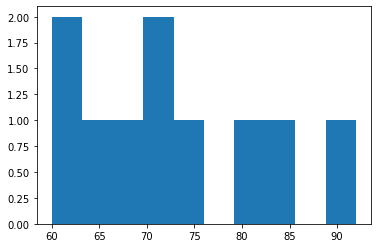

In [17]:
plt.hist(emp.Chur_rate)

{'whiskers': [<matplotlib.lines.Line2D at 0x214631388c8>,
 'caps': [<matplotlib.lines.Line2D at 0x21463138fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x21463132e08>],
 'medians': [<matplotlib.lines.Line2D at 0x2146313df88>],
 'fliers': [<matplotlib.lines.Line2D at 0x21463143f88>],
 'means': []}

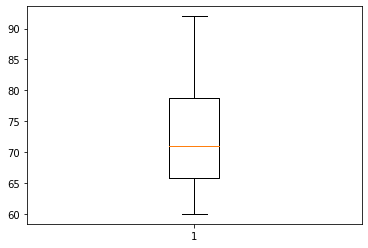

In [18]:
plt.boxplot(emp.Chur_rate)

In [19]:
# The above histogram and boxplot indicates that the data is "not normally distributed" and it is distributed more towards left, hence it is "right skewed" and since the kurtosis < 3, it is "platykurtic".

Text(0, 0.5, 'Churn out rate')

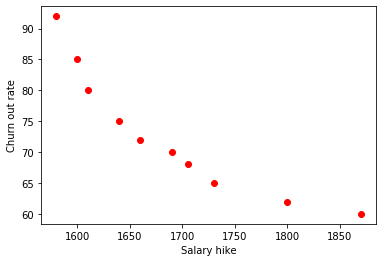

In [20]:
plt.plot(emp.Sal_hike, emp.Chur_rate, "ro"); plt.xlabel("Salary hike"); plt.ylabel("Churn out rate")
# plot showing the relation between dependent and independent variables

In [21]:
emp.Chur_rate.corr(emp.Sal_hike)      # checking the correlation between the dependent and independent variablesb

-0.9117216186909108

In [22]:
# For preparing linear regression model importing the statsmodels.formula.api

In [23]:
import statsmodels.formula.api as smf

In [24]:
model = smf.ols("Chur_rate ~ Sal_hike", data = emp).fit()      # linear model

In [25]:
model.params

Intercept    244.364911
Sal_hike      -0.101543
dtype: float64

In [26]:
model.summary()

C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Chur_rate   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     39.40
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           0.000239
Time:                        21:48:03   Log-Likelihood:                -28.046
No. Observations:                  10   AIC:                             60.09
Df Residuals:                       8   BIC:                             60.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    244.3649     27.352      8.934      0.000     181.291     307.439
Sal_hike      -0.1015      0.016     -6.277      0.000      -0.139      -0.064
==============================================================================
Omnibus:                        2.201   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.333   Jarque-Bera (JB):                1.408
Skew:                           0.851   Prob(JB):                        0.495
Kurtosis:                       2.304   Cond. No.                     3.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
print(model.conf_int(0.05))

                    0           1
Intercept  181.291232  307.438591
Sal_hike    -0.138845   -0.064240


In [28]:
# Predicting the values using the model

In [29]:
pred = model.predict(emp.Sal_hike)
pred

0    83.927531
1    81.896678
2    80.881252
3    77.834973
4    75.804120
5    72.757840
6    71.133158
7    68.696134
8    61.588149
9    54.480164
dtype: float64

Text(0, 0.5, 'Churn out')

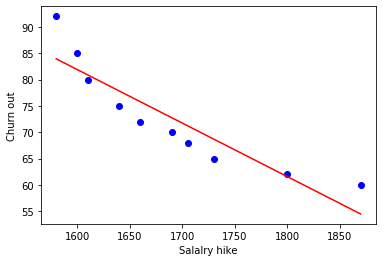

In [30]:
plt.scatter(emp.Sal_hike,emp.Chur_rate, c="b"); plt.plot(emp.Sal_hike, pred, c="r"); plt.xlabel("Salalry hike"); plt.ylabel("Churn out")
# plot showing the acutal values v/s the model's best fit line or regressed line

In [31]:
pred.corr(emp.Chur_rate)

0.9117216186909112

In [32]:
# bulinding another model(exponential) to check whether the R_square value can be increased

In [33]:
model2 = smf.ols("Chur_rate ~ np.log(Sal_hike)", data = emp).fit()

In [34]:
model2.params

Intercept           1381.456193
np.log(Sal_hike)    -176.109735
dtype: float64

In [35]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Chur_rate   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     44.85
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           0.000153
Time:                        21:48:04   Log-Likelihood:                -27.502
No. Observations:                  10   AIC:                             59.00
Df Residuals:                       8   BIC:                             59.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1381.4562    195.402      7.070      0.000     930.858    1832.054
np.log(Sal_hike)  -176.1097     26.297     -6.697      0.000    -236.751    -115.468
==============================================================================
Omnibus:                        2.213   Durbin-Watson:                   0.571
Prob(Omnibus):                  0.331   Jarque-Bera (JB):                1.418
Skew:                           0.853   Prob(JB):                        0.492
Kurtosis:                       2.298   Cond. No.                     1.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
print(model2.conf_int(0.05))

                           0            1
Intercept         930.858413  1832.053972
np.log(Sal_hike) -236.751223  -115.468248


In [37]:
# Predicting the values using the model

In [38]:
pred2 = model2.predict(emp.Sal_hike)
pred2

0    84.376270
1    82.161024
2    81.063764
3    77.812415
4    75.677725
5    72.523437
6    70.863969
7    68.403723
8    61.418285
9    54.699388
dtype: float64

Text(0, 0.5, 'Churn rate')

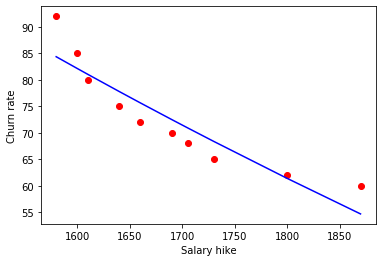

In [39]:
plt.scatter(emp.Sal_hike, emp.Chur_rate, c="r"); plt.plot(emp.Sal_hike,pred2,c="b");plt.xlabel("Salary hike"); plt.ylabel("Churn rate")
# plot showing the acutal values v/s the model's best fit line or regressed line

In [40]:
pred2.corr(emp.Chur_rate)

0.9212077312118847

In [41]:
# bulinding another model(exponential) to check whether the R_square value can be increased

In [42]:
model3 = smf.ols("np.log(Chur_rate)~Sal_hike", data=emp).fit()

In [43]:
model3.params

Intercept    6.638300
Sal_hike    -0.001396
dtype: float64

In [44]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(Chur_rate)   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     55.26
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           7.38e-05
Time:                        21:48:05   Log-Likelihood:                 16.511
No. Observations:                  10   AIC:                            -29.02
Df Residuals:                       8   BIC:                            -28.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.6383      0.318     20.902      0.000       5.906       7.371
Sal_hike      -0.0014      0.000     -7.434      0.000      -0.002      -0.001
==============================================================================
Omnibus:                        1.935   Durbin-Watson:                   0.585
Prob(Omnibus):                  0.380   Jarque-Bera (JB):                1.314
Skew:                           0.780   Prob(JB):                        0.519
Kurtosis:                       2.152   Cond. No.                     3.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
print(model3.conf_int(0.05))

                  0         1
Intercept  5.905917  7.370683
Sal_hike  -0.001829 -0.000963


In [46]:
pred_log = model3.predict(emp.Sal_hike)    # predicted values
pred_log

0    4.432091
1    4.404164
2    4.390201
3    4.348311
4    4.320384
5    4.278494
6    4.256153
7    4.222641
8    4.124897
9    4.027154
dtype: float64

In [47]:
pred3 = np.exp(pred_log)
pred3

0    84.107097
1    81.790758
2    80.656622
3    77.347701
4    75.217518
5    72.131736
6    70.538084
7    68.213379
8    61.861455
9    56.101012
dtype: float64

Text(0, 0.5, 'Churn rate')

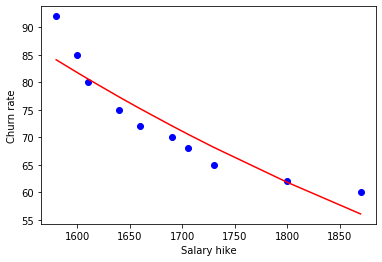

In [48]:
plt.scatter(emp.Sal_hike, emp.Chur_rate, c="b");plt.plot(emp.Sal_hike, pred3, c="r");plt.xlabel("Salary hike");plt.ylabel("Churn rate")
# plot showing the acutal values v/s the model's best fit line or regressed line

In [49]:
pred3.corr(emp.Chur_rate)

0.9334219364827093

In [50]:
emp["Sal_hike_sq"] = emp.Sal_hike*emp.Sal_hike

In [51]:
# bulinding another model(quadratic) to check whether the R_square value can be increased

In [52]:
model4 = smf.ols("np.log(Chur_rate)~ Sal_hike+Sal_hike_sq", data=emp).fit()

In [53]:
model4.params

Intercept      23.176235
Sal_hike       -0.020680
Sal_hike_sq     0.000006
dtype: float64

In [54]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(Chur_rate)   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     210.1
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           5.63e-07
Time:                        21:48:07   Log-Likelihood:                 26.728
No. Observations:                  10   AIC:                            -47.46
Df Residuals:                       7   BIC:                            -46.55
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      23.1762      2.415      9.597      0.000      17.466      28.887
Sal_hike       -0.0207      0.003     -7.351      0.000      -0.027      -0.014
Sal_hike_sq  5.605e-06   8.17e-07      6.857      0.000    3.67e-06    7.54e-06
==============================================================================
Omnibus:                        0.520   Durbin-Watson:                   1.272
Prob(Omnibus):                  0.771   Jarque-Bera (JB):                0.506
Skew:                          -0.088   Prob(JB):                        0.777
Kurtosis:                       1.913   Cond. No.                     1.10e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
print(model4.conf_int(0.05))

                     0          1
Intercept    17.465629  28.886840
Sal_hike     -0.027333  -0.014028
Sal_hike_sq   0.000004   0.000008


In [56]:
pred_quad =model4.predict(emp)     # predicted values
pred_quad

0    4.493907
1    4.436784
2    4.409904
3    4.335990
4    4.292320
5    4.235222
6    4.208895
7    4.174785
8    4.112180
9    4.104504
dtype: float64

In [57]:
pred4 = np.exp(pred_quad)
pred4

0    89.470282
1    84.502725
2    82.261561
3    76.400595
4    73.135942
5    69.076991
6    67.282128
7    65.025854
8    61.079708
9    60.612686
dtype: float64

Text(0, 0.5, 'Churn rate')

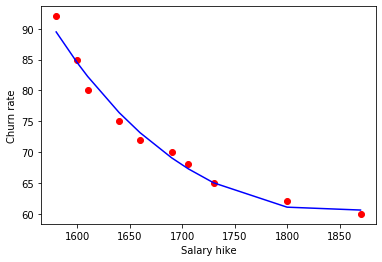

In [58]:
plt.scatter(emp.Sal_hike, emp.Chur_rate, c="r");plt.plot(emp.Sal_hike, pred4, c="b");plt.xlabel("Salary hike");plt.ylabel("Churn rate")
# plot showing the acutal values v/s the model's best fit line or regressed line

In [59]:
pred4.corr(emp.Chur_rate)

0.9907286170132285

In [60]:
# Creating the table of models and thier R_square values

In [61]:
data = {"Model":pd.Series(["model1_linear","model2_exponential","model3_exponential","model4_quadratic"]),"R_square_values":(0.831,0.849,0.874,0.984)}

In [62]:
table_rsquare = pd.DataFrame(data)
table_rsquare

,Model,R_square_values
0,model1_linear,0.831
1,model2_exponential,0.849
2,model3_exponential,0.874
3,model4_quadratic,0.984


In [63]:
# Out of all the 4 models, last model (quadratic_model) has the highest R-square value, hence it is the best fit model

In [64]:
student_resid = model4.resid_pearson    # Calculating the standard residuals of the best model
student_resid

array([ 1.39604775,  0.29378287, -1.39581013, -0.92640945, -0.78378245,
        0.66460321,  0.53139332, -0.01991143,  0.7487774 , -0.50869109])

Text(0, 0.5, 'Standard residuals')

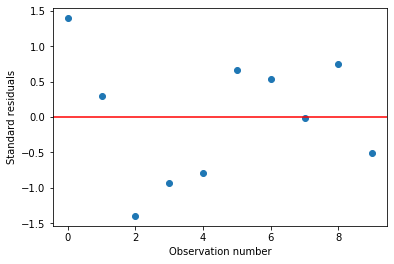

In [65]:
plt.plot(student_resid, "o");plt.axhline(y=0, c="r");plt.xlabel("Observation number");plt.ylabel("Standard residuals")
# plot showing the standard residuals v/s observed values

Text(0, 0.5, 'Actual')

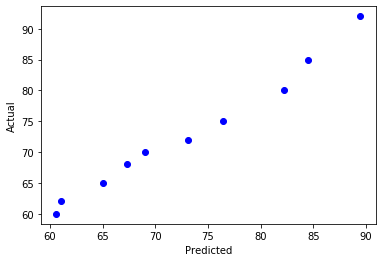

In [66]:
plt.scatter(pred4, emp.Chur_rate, c="b");plt.xlabel("Predicted");plt.ylabel("Actual")
# plot showing the relation between the actual and predicted values of best fit model

(array([1., 1., 1., 1., 1., 0., 2., 2., 0., 1.]),
 array([-1.39581013e+00, -1.11662435e+00, -8.37438557e-01, -5.58252769e-01,
        -2.79066981e-01,  1.18806651e-04,  2.79304595e-01,  5.58490383e-01,
         8.37676171e-01,  1.11686196e+00,  1.39604775e+00]),
 <a list of 10 Patch objects>)

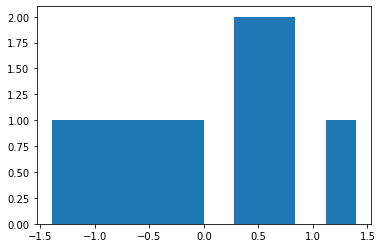

In [67]:
plt.hist(student_resid)      # histogram of standard residuals